# __Notebook über mean-shift Algorithmus und Anwendung auf RadarScenes__ 

## 1. Mean shift mit zufälligem Beispiel ausprobieren

Mean Shift Clustering ist ein iteratives, nicht-parametrisches Clustering-Verfahren, das versucht, die Dichte von Datenpunkten zu maximieren. Es basiert darauf, dass sich die Datenpunkte zu den Regionen mit höchster Dichte bewegen. Mean Shift verwendet sogenannte Kernels (meist Gauß-Kernel), um Dichte-Schätzungen zu berechnen. Anstatt die Anzahl der Cluster im Voraus festzulegen, verschiebt der Algorithmus iterativ Punkte in Richtung höherer Dichtebereiche, bis er die Modi der Datenverteilung findet. Dies ermöglicht die Erkennung von Clustern beliebiger Form und Größe, was ihn besonders flexibel und anpassungsfähig für verschiedene Anwendungen macht.

__Vorteile:__
- Kein Vorwissen über die Anzahl der Cluster nötig: Die Anzahl der Cluster ergibt sich dynamisch.
- Robust gegenüber Formen: Kann Cluster beliebiger Form finden.
- Dichtebasiert: Arbeitet gut bei Dichteunterschieden in den Daten.

__Nachteile:__
- Rechenintensiv: Besonders bei großen Datensätzen langsam.
- Parameterabhängigkeit: Der Bandbreitenparameter hat großen Einfluss auf das Ergebnis.
- Skalierungsprobleme: Nicht gut für sehr große Datensätze geeignet.


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

number of cluster: 9


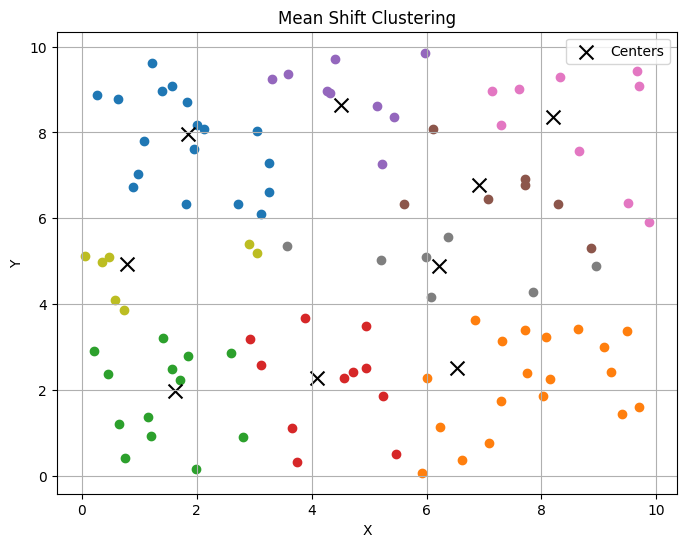

In [6]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Generate example data (you can replace this with your own x and y coordinates)
np.random.seed(42)
x = np.random.rand(100) * 10
y = np.random.rand(100) * 10
data = np.column_stack((x, y))

# Apply Mean Shift clustering
bandwidth = 2  # Set the bandwidth parameter manually or use estimate_bandwidth
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(data)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
print(f"number of cluster: {len(cluster_centers)}")

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = plt.get_cmap("tab10")

for label in np.unique(labels):
    cluster_points = data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors(label))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='black', marker='x', s=100, label='Centers')
plt.title("Mean Shift Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


## 2. parameter tuning 

Banbreite wurde in diesem Beispiel auf 1 gesetzt

__bandwidth__

- Definition: Sie definiert die Größe des Suchfensters (Radius), innerhalb dessen der Algorithmus die Dichte der Punkte berechnet
- kleine Bandbreite -> kleineren Cluster
- große Bandbreite -> größeren Cluster

__bin_seeding__

- Wenn True, werden die initialen Kernel-Positionen nicht an allen Datenpunkten, sondern an den Positionen der diskretisierten Version der Punkte gesetzt. 
- Dies kann den Algorithmus beschleunigen, da weniger Startpunkte initialisiert werden. Standardwert ist False.

__min_bin_freq__ 

- Gibt an, wie viele Punkte mindestens in einem Bin sein müssen, damit er als Seed berücksichtigt wird (Standard: 1).
- Nützlich: Um Cluster aus sehr kleinen Gruppen von Punkten zu vermeiden.

__max_iter__ 

- Maximale Anzahl von Iterationen des Algorithmus, um Konvergenz zu erreichen (Standard: 300).
- Nützlich: Bei sehr komplexen Datensätzen, um sicherzustellen, dass der Algorithmus nicht zu lange läuft.

__seeds__

- Legt die Startpunkte für die Kernel fest. Wenn nicht gesetzt, werden die Startpunkte mit get_bin_seeds basierend auf der Bandbreite berechnet.

__min_bin_freq__

- Akzeptiert nur Bins mit mindestens min_bin_freq Punkten als Startpunkte, um den Algorithmus zu beschleunigen. Standardwert ist 1.

__cluster_all__
- Wenn True, werden alle Punkte geclustert, auch diejenigen, die nicht innerhalb eines Kernels liegen. Diese Punkte werden dem nächstgelegenen Kernel zugewiesen. 
- Wenn False, erhalten diese Punkte das Cluster-Label -1. Standardwert ist True. 

__n_jobs__

- Bestimmt die Anzahl der parallelen Jobs für die Berechnung. None bedeutet 1, es sei denn, es wird in einem joblib.parallel_backend-Kontext verwendet. -1 bedeutet, dass alle Prozessoren verwendet werden. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

number of cluster: 30


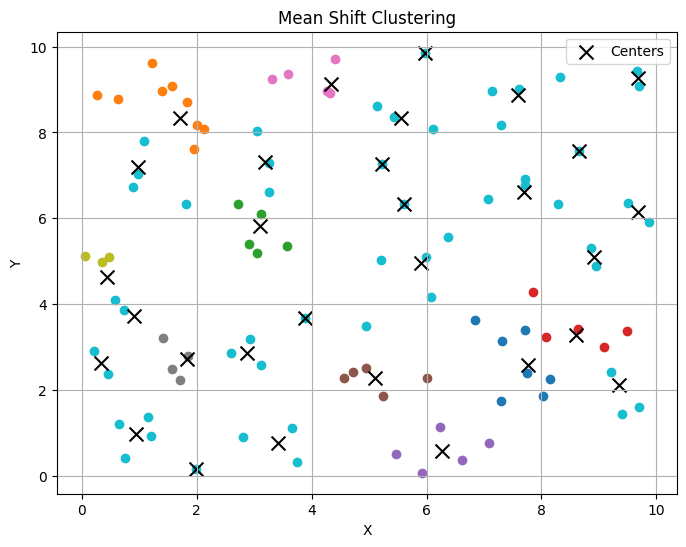

In [5]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Generate example data (you can replace this with your own x and y coordinates)
np.random.seed(42)
x = np.random.rand(100) * 10
y = np.random.rand(100) * 10
data = np.column_stack((x, y))

# Apply Mean Shift clustering
bandwidth = 1  # Set the bandwidth parameter manually or use estimate_bandwidth
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(data)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
print(f"number of cluster: {len(cluster_centers)}")

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = plt.get_cmap("tab10")

for label in np.unique(labels):
    cluster_points = data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors(label))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='black', marker='x', s=100, label='Centers')
plt.title("Mean Shift Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

## 3. Bandbreite schätzen lassen mit der Funktion estimate_bandwidth

__bin_seeding__


wenn auf true gesetzt:
- Funktion: Es reduziert die Anzahl der Startpunkte für den Mean-Shift-Prozess. Statt jeden Punkt als möglichen Startpunkt zu verwenden, teilt es den Raum in ein Gitter ein (Bins) und verwendet nur die Bins mit genügend Punkten als Startpunkte.
- Vorteil: Reduziert die Rechenzeit erheblich, besonders bei großen Datensätzen.
- Nachteil: Kann zu weniger präzisen Clustern führen, da potenziell interessante Startpunkte ausgelassen werden.

__quantile__

aus dem modul estimate_bandwidth

Was ist quantile und was sagt der Wert 0.2 aus?
Der Parameter quantile wird in der Funktion estimate_bandwidth verwendet:

- Funktion: Er legt fest, welcher Anteil der Abstände zwischen den Datenpunkten berücksichtigt wird, um die Bandbreite zu schätzen.
- Wert 0.2: Bedeutet, dass das 20%-Quantil (also der Wert, unter dem 20% der Abstände liegen) als Basis für die Bandbreite genommen wird. 
- kleiner Wert -> kleine cluster
- großer Wert -> große cluster

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

Estimated Bandwidth: 2.942888687159376
number of cluster: 4


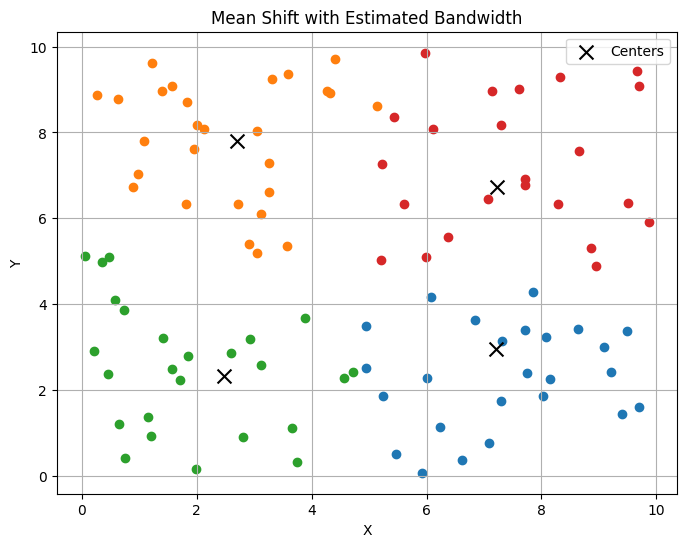

In [9]:
# Demonstrating parameter tuning
# Estimate bandwidth automatically
estimated_bandwidth = estimate_bandwidth(data, quantile=0.2)
print(f"Estimated Bandwidth: {estimated_bandwidth}")

# Apply Mean Shift with estimated bandwidth
mean_shift_auto = MeanShift(bandwidth=estimated_bandwidth, bin_seeding=False)
mean_shift_auto.fit(data)
labels_auto = mean_shift_auto.labels_
cluster_centers_auto = mean_shift_auto.cluster_centers_
print(f"number of cluster: {len(cluster_centers_auto)}")

# Plot the results with estimated bandwidth
plt.figure(figsize=(8, 6))
colors_auto = plt.get_cmap("tab10")

for label in np.unique(labels_auto):
    cluster_points = data[labels_auto == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors_auto(label))

plt.scatter(cluster_centers_auto[:, 0], cluster_centers_auto[:, 1], 
            c='black', marker='x', s=100, label='Centers')
plt.title("Mean Shift with Estimated Bandwidth")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


## 4. Funktionsweise des Mean-Shift-Algorytmus

Der Mean-Shift-Algorithmus ist ein nicht-parametrischer Clustering-Algorithmus, der Datenpunkte basierend auf der Dichte ihrer Verteilung gruppiert.

__Funktionsweise__

1. Initialisierung: Jeder Datenpunkt wird als potenzielles Clusterzentrum betrachtet.
2. Dichteschätzung: Für jeden Punkt wird ein Umgebungsbereich (definiert durch eine Bandbreite) festgelegt, und der Mittelwert der Punkte innerhalb dieses Bereichs wird berechnet.
3. Verschiebung: Der betrachtete Punkt wird zum berechneten Mittelwert verschoben, wodurch er sich in Richtung der Region mit höherer Dichte bewegt.
4. Iteration: Die Schritte 2 und 3 werden wiederholt, bis die Verschiebung minimal ist, was bedeutet, dass ein Dichtemaximum erreicht wurde.
5. Clusterbildung: Punkte, die zu denselben Dichtemaxima konvergieren, werden als ein Cluster betrachtet.

Dieser Prozess ermöglicht es, Cluster ohne vorherige Festlegung ihrer Anzahl zu identifizieren und ist besonders effektiv bei der Erkennung von Clustern unterschiedlicher Formen.

https://www.datacamp.com/de/tutorial/mean-shift-clustering?utm_source=chatgpt.com
https://hahn-schickard.gitbook.io/embedml/2_ml/2.5_unueberwachtes_lernen/2.5.1_clustering_algorithmen/2.5.1.3_mean_shift_clustering?utm_source=chatgpt.com

Gute Demo:
https://clustering-visualizer.web.app/mean-shift

## 5. Mathematische Formeln

Der Mean-Shift-Algorithmus ist ein nicht-parametrischer Clustering-Algorithmus, der darauf abzielt, die Modi (lokalen Maxima) einer Wahrscheinlichkeitsdichtefunktion in einem gegebenen Datensatz zu identifizieren. Die mathematischen Grundlagen dieses Algorithmus basieren auf der Kernel-Dichteschätzung und der iterativen Verschiebung von Datenpunkten in Richtung höherer Dichtebereiche.

**1. Kernel-Dichteschätzung (KDE):**

Die Dichtefunktion \( f(x) \) an einem Punkt \( x \) wird durch die Summe der Kernel-Funktionen über alle Datenpunkte \( x_i \) geschätzt:

$$
f(x) = \frac{1}{n h^d} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$


Dabei ist:

- \( n \): Anzahl der Datenpunkte
- \( h \): Bandbreite des Kernels (bestimmt die Größe des Fensters)
- \( d \): Dimension des Datenraums
- \( K \): Kernel-Funktion, z. B. ein Gaußscher Kernel

**2. Mean-Shift-Vektor:**

Der Mean-Shift-Vektor \( m(x) \) wird berechnet, um die Richtung der höchsten Dichtezunahme anzugeben:

$$
m(x) = \frac{\sum_{i=1}^{n} x_i \cdot K\left( \frac{x - x_i}{h} \right)}{\sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)} - x
$$


Dieser Vektor zeigt vom aktuellen Punkt \( x \) zum gewichteten Mittelwert der Punkte in seiner Nachbarschaft.

**3. Iterative Aktualisierung:**

Der Punkt \( x \) wird iterativ in Richtung des Mean-Shift-Vektors verschoben:

$$
x_{\text{neu}} = x_{\text{alt}} + m(x_{\text{alt}})
$$


Dieser Vorgang wird wiederholt, bis die Verschiebung unter einen bestimmten Schwellenwert fällt, was bedeutet, dass ein Dichtemaximum erreicht wurde.

**Zusammenfassung:**

Der Mean-Shift-Algorithmus nutzt die Kernel-Dichteschätzung, um die Dichteverteilung der Daten zu bestimmen, und verschiebt Datenpunkte iterativ in Richtung der höchsten Dichte. Dies ermöglicht die Identifizierung von Clustern ohne vorherige Annahmen über deren Anzahl oder Form.

https://www.datacamp.com/de/tutorial/mean-shift-clustering?utm_source=chatgpt.com



## 6. Klusten der RadarScenes Daten mit mean-shift

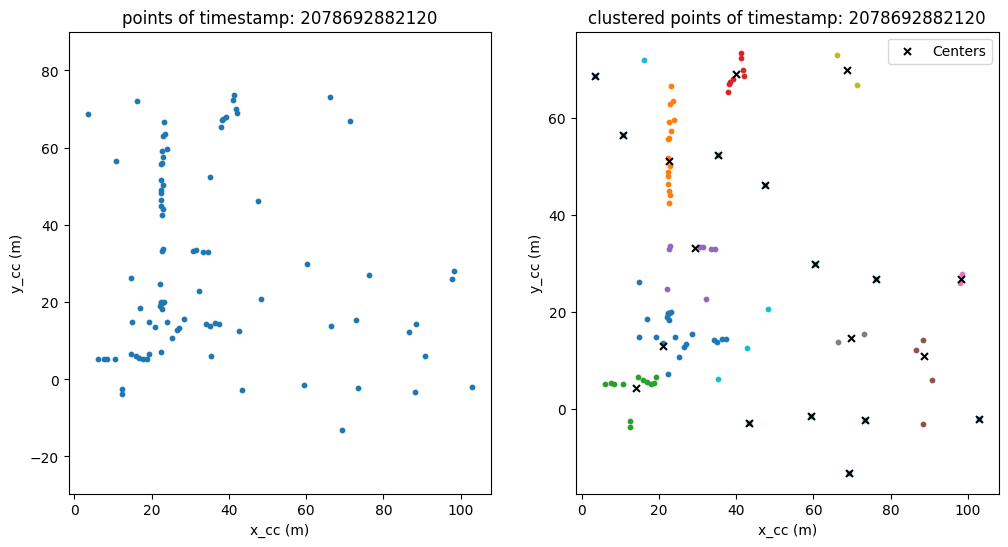

In [3]:
import h5py
import json
import textwrap
import shutil

from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import numpy as np

screen_width = shutil.get_terminal_size().columns

# define paths for radar data
sequence_path = 'RadarScenes/RadarScenes/data/sequence_4/'
image = "2078692054115.jpg"
image_path = sequence_path + 'camera/' + image
annotations_path = sequence_path + 'scenes.json'
h5_path = sequence_path + 'radar_data.h5'

# open dataset and annotations
with h5py.File(h5_path, 'r') as h5_file:
    radar_data = h5_file['radar_data'][:]
with open(annotations_path, 'r', encoding='utf-8') as json_file:
    annotations = json.load(json_file) 

# define timestamp
timestamp = radar_data["timestamp"][6000]

# get points of defined timestamp
mask = radar_data["timestamp"][:] == timestamp
x_cc = radar_data['x_cc'][mask]
y_cc = radar_data['y_cc'][mask]
data = np.column_stack((x_cc, y_cc))



# define mean-shift
bandwidth = 10
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(data)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Plot the clustered data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# unclustered points
scatter = ax1.scatter(x_cc, y_cc, s=10)
ax1.set_xlabel('x_cc (m)')
ax1.set_ylabel('y_cc (m)')
ax1.set_title(f"points of timestamp: {timestamp}")
ax1.axis('equal')

# clustered points
colors = plt.get_cmap("tab10")
for label in np.unique(labels):
    cluster_points = data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors(label), s=10)
ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='black', marker='x', s=25, label='Centers')
ax2.set_title(f"clustered points of timestamp: {timestamp}")
ax2.set_xlabel('x_cc (m)')
ax2.set_ylabel('y_cc (m)')
ax2.legend()

plt.show()